# Time Series Part 1: 
This week's material provides a brief introduction into the basics of time series. This work assumes that the reader is familiar with concepts in regression and statistical theory. 

In [1]:
##------------------------------------
## Load Packages
##------------------------------------
import pandas as pd                    ## Manipulate df          
import numpy as np                     ## Manipulate list 
from matplotlib.pyplot import *        ## Plot
from scipy.optimize import curve_fit   ## Fit Linear and Exponential Trend Lines
%matplotlib inline

## Monday: Visualize the data

In [2]:
##------------------------------------
## Curate Data
##------------------------------------
weight = pd.read_csv('weight_eman.csv',parse_dates=['Date'])

## Replace NaNs with Mean
weight['Weight'].fillna((weight['Weight'].mean()), inplace=True)

## View Data
weight.head() 

,Date,Weight
0,2018-02-11,213.0
1,2018-02-12,212.8
2,2018-02-13,210.0
3,2018-02-14,209.2
4,2018-02-15,206.6


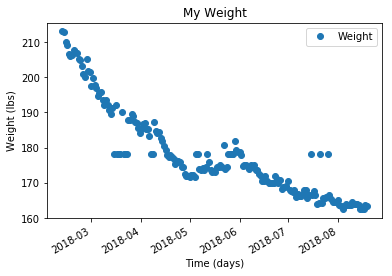

In [3]:
##------------------------------------
## Plot Data
##------------------------------------
ax1 =  weight.plot(x='Date',y='Weight', style="o", 
                 title ='My Weight')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Weight (lbs)')
savefig('weight.png')

## Tuesday: Fit the data

In [4]:
##------------------------------------
## Functions for linear and exponential curve fitting
##------------------------------------
def expo_func(x, a, c, d):
    """ Fit an exponential curve to data"""
    return a*np.exp(-c*x)+d

def line_func(x, a, d):
    """ Fit an linear curve to data"""
    return a*x+ d

In [5]:
##------------------------------------
## Fit Constant, Linear, and Exponential lines
##------------------------------------

## Input for linear and exponential functions
x = np.linspace(0, 190, 190)
wgt = weight['Weight']
y = wgt.tolist()

## Determine the linear and exponential fits
popt_line, pcov_line = curve_fit(line_func, x, y, p0=(1, 1e-6))
popt_expo, pcov_expo = curve_fit(expo_func, x, y, p0=(1, 1e-6, 1))

## Determine the expected values for constant, linear and exponential fits
## Constant Weight is the Average of the Weight
weight['constant_weight'] = weight['Weight'].mean()
## Linear Weight 
weight['linear_weight'] = line_func(x, *popt_line)
## Exponential Weight 
weight['exponential_weight'] = expo_func(x, *popt_expo)



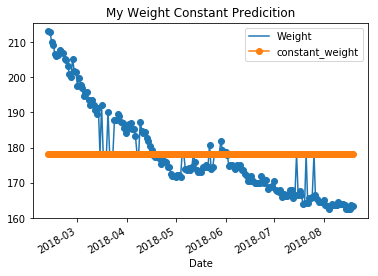

In [6]:
##------------------------------------
## Plot Constant Fit
##------------------------------------
ax = weight[['Date', 'Weight']].plot(
    x='Date', linestyle='-', marker='o', 
                 title ='My Weight Constant Predicition')

weight[['Date', 'constant_weight']].plot(x='Date', marker='o',
                                                        ax=ax)
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Weight (lbs)')
savefig('weight_constant.png')

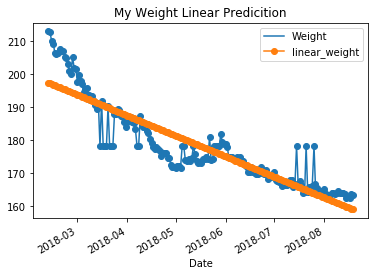

In [7]:
##------------------------------------
## Plot Linear Fit
##------------------------------------
ax = weight[['Date', 'Weight']].plot(
    x='Date', linestyle='-', marker='o', 
                 title ='My Weight Linear Predicition')

weight[['Date', 'linear_weight']].plot(x='Date', marker='o',
                                                        ax=ax)
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Weight (lbs)')
savefig('weight_linear.png')

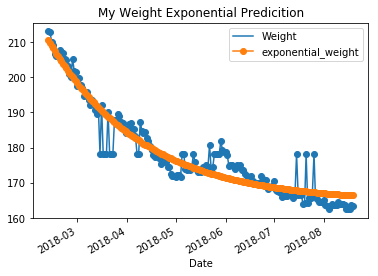

In [8]:
##------------------------------------
## Plot Exponential Fit
##------------------------------------
ax = weight[['Date', 'Weight']].plot(
    x='Date', linestyle='-', marker='o',
                 title ='My Weight Exponential Predicition')

weight[['Date', 'exponential_weight']].plot(x='Date', marker='o',
                                                        ax=ax)
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Weight (lbs)')
savefig('weight_exponential.png')

## Wednesday: Autocorrelation within the models

In [9]:
##------------------------------------
## Calculate Error
##------------------------------------
weight['constant_error'] = weight['Weight'] - weight['constant_weight']
weight['linear_error'] = weight['Weight'] - weight['linear_weight']
weight['exponential_error'] = weight['Weight'] - weight['exponential_weight']
weight['horizontal_line'] = 0
weight.head()

,Date,Weight,constant_weight,linear_weight,exponential_weight,constant_error,linear_error,exponential_error,horizontal_line
0,2018-02-11,213.0,178.176023,197.441003,210.477532,34.823977,15.558997,2.522468,0
1,2018-02-12,212.8,178.176023,197.237141,209.691028,34.623977,15.562859,3.108972,0
2,2018-02-13,210.0,178.176023,197.033279,208.918020,31.823977,12.966721,1.081980,0
3,2018-02-14,209.2,178.176023,196.829417,208.158276,31.023977,12.370583,1.041724,0
4,2018-02-15,206.6,178.176023,196.625554,207.411568,28.423977,9.974446,-0.811568,0


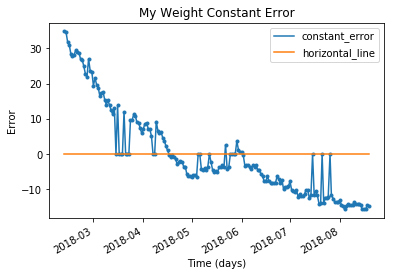

In [10]:
##------------------------------------
## Plot Constant Error
##------------------------------------
ax1 = weight[['Date', 'constant_error']].plot(
    x='Date', marker='.',
                 title ='My Weight Constant Error')

weight[['Date', 'horizontal_line']].plot(x='Date', kind='line',
                                                        ax=ax1)
##
## Add a horizontal line at 0
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Error')
savefig('weight_constant_error.png')

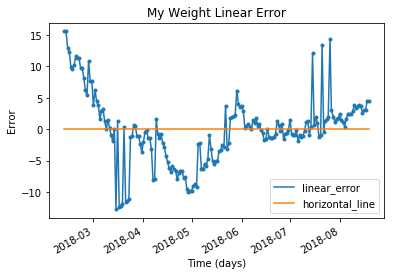

In [11]:
##------------------------------------
## Plot Linear Error
##------------------------------------
ax1 = weight[['Date', 'linear_error']].plot(
    x='Date',marker='.',
                 title ='My Weight Linear Error')


weight[['Date', 'horizontal_line']].plot(x='Date', kind='line',
                                                        ax=ax1)
##
## Add a horizontal line at 0
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Error')
savefig('weight_linear_error.png')

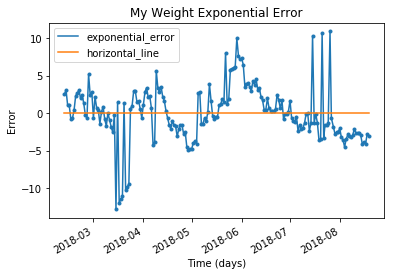

In [12]:
##------------------------------------
## Plot Exponential Error
##------------------------------------
ax1 = weight[['Date', 'exponential_error']].plot(
    x='Date', marker='.',
                 title ='My Weight Exponential Error')


weight[['Date', 'horizontal_line']].plot(x='Date', kind='line',
                                                        ax=ax1)

## Add a horizontal line at 0
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Error')
savefig('weight_exponential_error.png')

In [13]:
##------------------------------------
## Durbin-Watson Function
##------------------------------------
def durbin_watson_stat(error_term):
    """ Calculate the Durbin-Watson Test Statistic"""
    ## Square difference btw current error and previous
    vector_diff = []
    for i in range(1,len(error_term)):
        diff = (error_term[i] - error_term[i-1])**2
        vector_diff.append(diff)
    ## Sum of square differences   
    numerator = sum(vector_diff)
    ## Squared sum of error
    denominator = sum([i ** 2 for i in error_term])
    
    ## Test Statistic
    TS = numerator/denominator
    return(TS)



In [14]:
##------------------------------------
## Use Durbin-Watson Function on fits
##------------------------------------
## Calculate DW for Fits
exponential_error = durbin_watson_stat(weight['exponential_error'])
linear_error = durbin_watson_stat(weight['linear_error'])
constant_error = durbin_watson_stat(weight['constant_error'])

## Print Values
print('Constant Test Statistic: \n')
print(constant_error,'\n')
print('Linear Test Statistic: \n')
print(linear_error,'\n')
print('Exponential Test Statistic: \n')
print(exponential_error,'\n')

Constant Test Statistic: 

0.0829729188749372 

Linear Test Statistic: 

0.42175323350961874 

Exponential Test Statistic: 

0.9070053009215666 



## Thursday: Autocorrelation within the data

In [15]:
##------------------------------------
## Graph Autocorrelation Function
##------------------------------------

def auto_corr_graph(shift,value_wrt):
    
    """ Graph autocorrelation """
    ## Detemine the day shift (wrt: with respect to)
    data_1 = value_wrt[shift:]
    lag_1  = value_wrt[:-shift]
    
    ## Determine Autocorrelation
    auto_corr = np.round(np.corrcoef(data_1,lag_1)[0,1],2)

    ## Determine strings for df and graph
    day_string = 'Lag by ' + str(shift) + ' days' 
    auto_corr_string = 'AC: ' + str(auto_corr)
    day_title = 'Day i  vs. Lag by i -' + str(shift) + ' days ' + auto_corr_string 

    ## Create df
    df_info = {'Day i': data_1, day_string: lag_1}
    tmp_df = pd.DataFrame(data = df_info)

    ## Fit Linear Line
    z = np.polyfit(x=tmp_df.loc[:,day_string],
                   y=tmp_df.loc[:,'Day i'], deg=1)
    p = np.poly1d(z)
    tmp_df['trendline'] =p(tmp_df.loc[:,day_string])
    
    ## Plot Scatter Plot
    ax1 = tmp_df[[day_string, 'Day i']].plot.scatter(x=day_string,
                                                     y='Day i',
                                                     marker ='o',
                                                     title =day_title)
    ## Plot Trend Line
    tmp_df[[day_string, 'trendline']].plot(x=day_string,
                                       kind='line',
                                       ax=ax1, 
                                       color='k')
    ## Save Plot
    plot_file_name = 'shift_by_' + str(shift)+ '_days.png'
    savefig(plot_file_name)


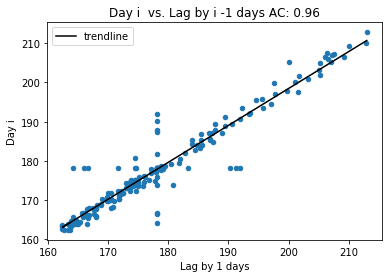

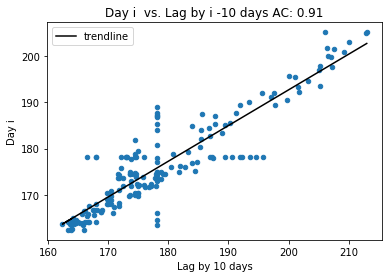

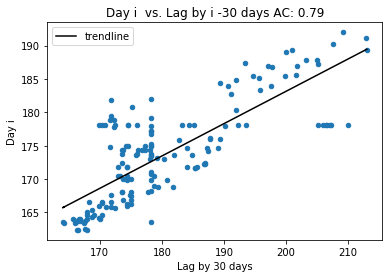

In [16]:
##------------------------------------
## Use Graph Autocorrelation Function on weight
##------------------------------------
weight_series = weight['Weight']
weight_list = weight_series.tolist()
auto_corr_graph(1,weight_list)
auto_corr_graph(10,weight_list)
auto_corr_graph(30,weight_list)

## Friday: Seasonal Variation

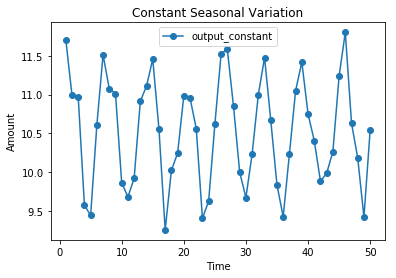

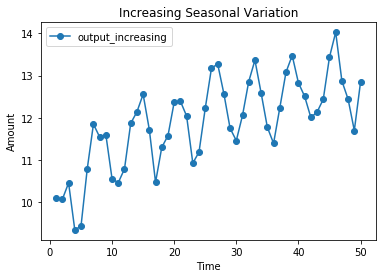

In [90]:
##------------------------------------
## Seasonal Variation 
##------------------------------------
## Parameters to generate random numbers
number_of_points = 50
number_of_time_points = 50
x = np.linspace(1, number_of_time_points, number_of_points)
randomness = np.random.rand(1,number_of_points)
shift_up = 10 + randomness[0]
increasing = np.log(0.2*x)

## Create data frame
d = {'input':x, 
     'output_constant':np.sin(x)   + shift_up  ,
     'output_increasing':np.sin(x) + increasing + shift_up }
df = pd.DataFrame(d)

## Constant Seasonal Variation
ax1 = df.plot(x='input',y='output_constant',
        marker = 'o',title ='Constant Seasonal Variation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amount')
## Save Plot
plot_file_name = 'constant_sesonal_variation.png'
savefig(plot_file_name)

## Increasing Seasonal Variation
ax1 = df.plot(x='input',y='output_increasing',
        marker = 'o',title ='Increasing Seasonal Variation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amount')
plot_file_name = 'increasing_sesonal_variation.png'
savefig(plot_file_name)

